In [82]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
import scipy.ndimage

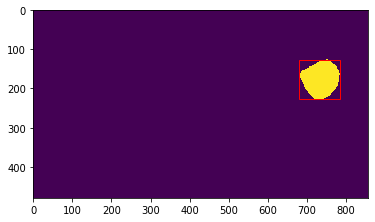

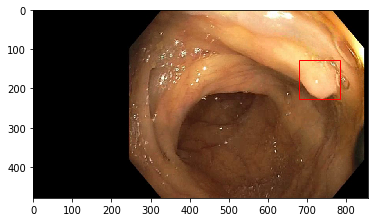

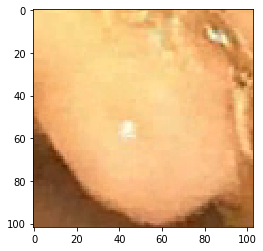

In [96]:
base_path = '/home/rilind/PycharmProjects/polyp_center/data/'
image_name = 'one'
image_path = base_path + image_name + '.tiff'
image_gt_path = base_path + image_name + '_GT.tiff'

normal = np.array(Image.open(image_path), dtype=np.uint8)
im = np.array(Image.open(image_gt_path), dtype=np.uint8)
im_copy = np.copy(im)
normal_copy = np.copy(normal)
# Create figure and axes
positive_values = np.where(im > 0)
total_height, total_width = im.shape[0], im.shape[-1]

x_axis = positive_values[0]
y_axis = positive_values[-1]

max_x, min_x = np.amax(y_axis), np.amin(y_axis)
max_y, min_y = np.amax(x_axis), np.amin(x_axis)

width = max_x - min_x
height = max_y - min_y

left_width, left_height = total_width - width, total_height - height

center_x = int(left_width / 2)
center_y = int(left_height / 2)

for i in range(width+1):
    for j in range(height+1):
        normal_copy[center_y+j][center_x+i] = normal[min_y + j][min_x + i]
        normal_copy[min_y + j][min_x + i] = 0
        im_copy[center_y+j][center_x+i] = im[min_y + j][min_x + i]
        im_copy[min_y + j][min_x + i] = 0


fig, ax = plt.subplots(1)
ax.imshow(im)
rect = patches.Rectangle((min_x, min_y), width, height, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)


fig, ax = plt.subplots(1)
ax.imshow(normal)
rect = patches.Rectangle((min_x, min_y), width, height, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

fig, ax = plt.subplots(1)
ax.imshow(normal_copy[center_y:center_y+height, center_x:center_x+width])
rect = patches.Rectangle((center_x, center_y), width, height, linewidth=1, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()